In [1]:
%matplotlib inline

import json
from tonic_identifier.tonic_identifier import TonicLastNote
from note_model.NoteModel import NoteModel
from pitchfilter.pitchfilter import PitchPostFilter


In [2]:
# inputs; pitch track and makam of the recording
recMakam = "ussak"
pitch = json.load(open("sample_data/63709068-3eb2-4ff1-9fa6-a3eb14166a36.json", 'r'))['pitch']

# Extra: Postprocess the pitch track to get rid of spurious pitch estimations and correct octave errors
flt = PitchPostFilter()
pitch = flt.run(pitch)


In [3]:
# run tonic identification using last note detection
tonic_identifier = TonicLastNote()
tonic, pitch, pitch_chunks, distribution, sp = tonic_identifier.identify(pitch)
tonicHz = tonic["value"]


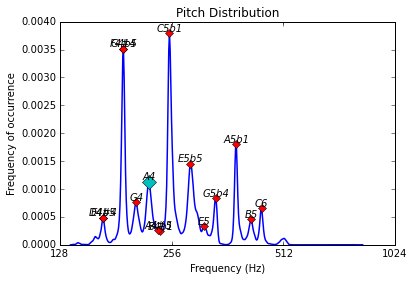

In [4]:
# Obtain the the stable notes
stablenotes = NoteModel.calculate_notes(distribution, tonicHz, recMakam)
NoteModel.plot(distribution, stablenotes)
